<a href="https://colab.research.google.com/github/springboardmentor0-commits/CNN-Based-Music-Instrument-Recognition-System-/blob/Vijay's-updates/InstruNet_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
instrument_names = [
    "brass",
    "flute",
    "guitar",
    "keyboard",
    "mallet",
    "reed",
    "string",
    "vocal"
]

label_to_name = dict(enumerate(instrument_names))
print(label_to_name)



{0: 'brass', 1: 'flute', 2: 'guitar', 3: 'keyboard', 4: 'mallet', 5: 'reed', 6: 'string', 7: 'vocal'}


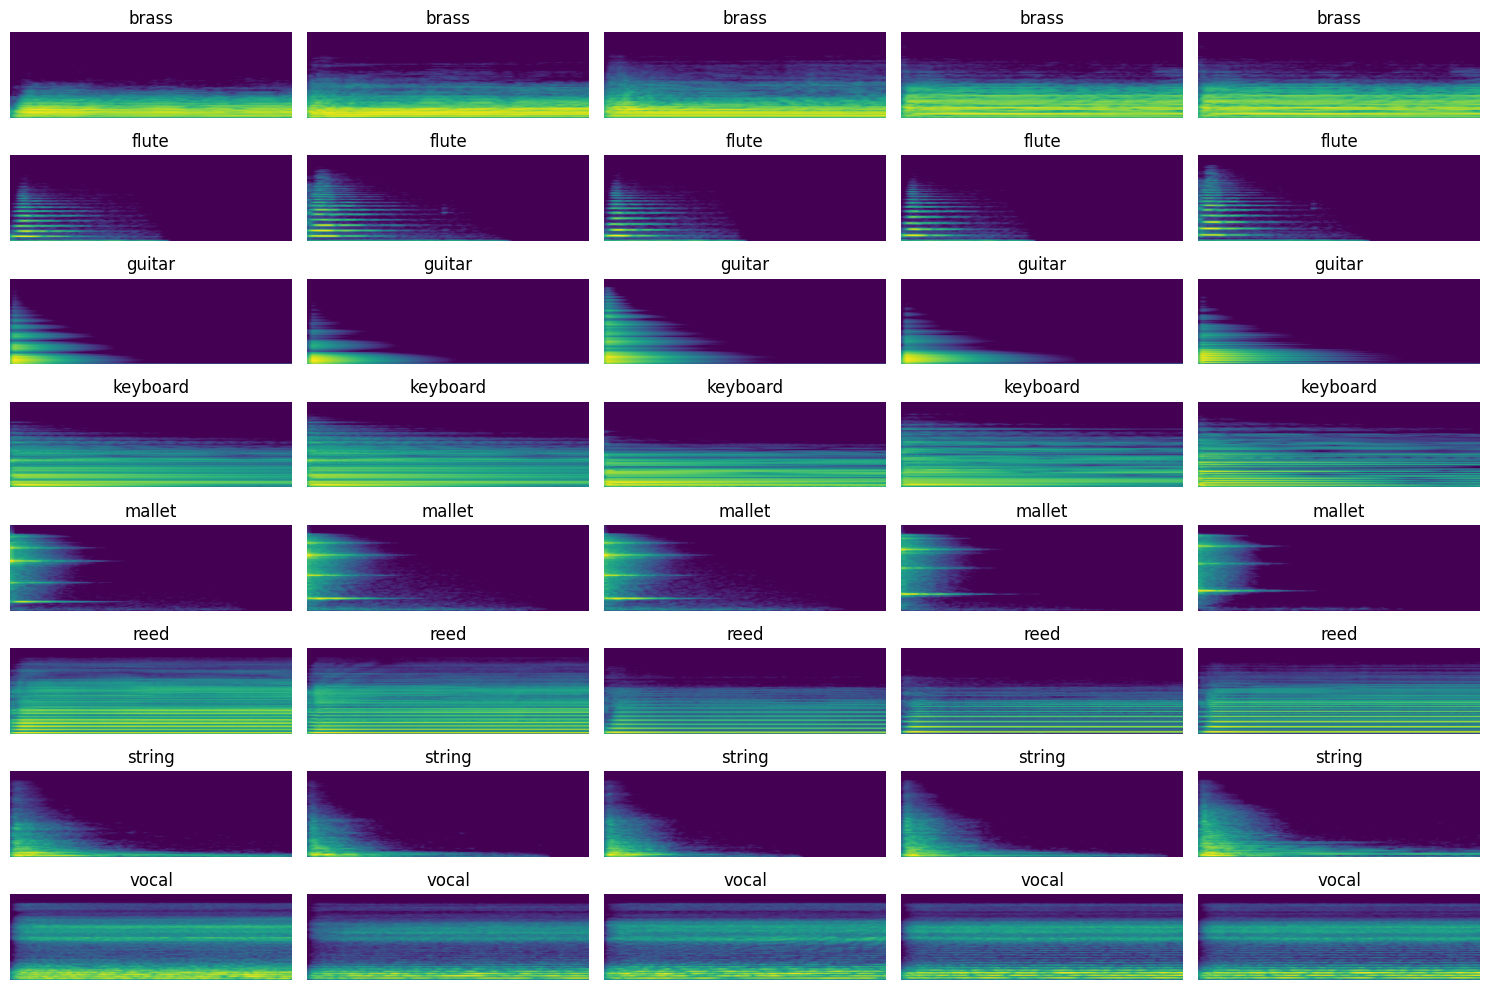

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = np.load("/content/drive/MyDrive/InstruNet-AI/Processed/X.npy")
y = np.load("/content/drive/MyDrive/InstruNet-AI/Processed/y.npy")

instrument_names = [
    "brass", "flute", "guitar", "keyboard",
    "mallet", "reed", "string", "vocal"
]

samples_per_class = 5
num_classes = len(instrument_names)

plt.figure(figsize=(15, 10))

plot_index = 1
for label in range(num_classes):
    indices = np.where(y == label)[0][:samples_per_class]

    for idx in indices:
        plt.subplot(num_classes, samples_per_class, plot_index)
        plt.imshow(X[idx], aspect='auto', origin='lower')
        plt.title(instrument_names[label])
        plt.axis('off')
        plot_index += 1

plt.tight_layout()
plt.show()



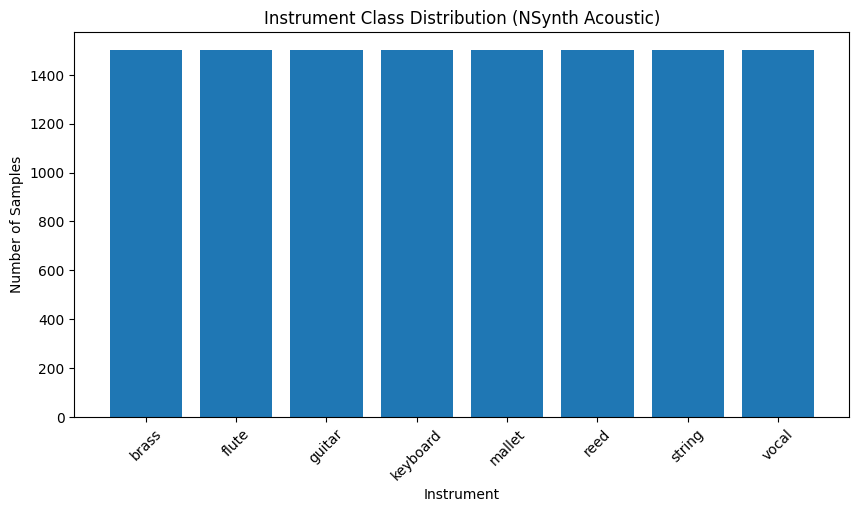

In [6]:
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(y, return_counts=True)
labels = [instrument_names[i] for i in unique]

plt.figure(figsize=(10, 5))
plt.bar(labels, counts)
plt.xlabel("Instrument")
plt.ylabel("Number of Samples")
plt.title("Instrument Class Distribution (NSynth Acoustic)")
plt.xticks(rotation=45)
plt.show()




In [7]:
import json

with open("label_mapping.json", "w") as f:
    json.dump(label_to_name, f)


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load data
X = np.load("/content/drive/MyDrive/InstruNet-AI/Processed/X.npy")
y = np.load("/content/drive/MyDrive/InstruNet-AI/Processed/y.npy")

# Reshape for CNN
X = X[..., np.newaxis]

# One-hot encode labels
y = to_categorical(y)

# Train-validation split (stratified)
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_val.shape)


(9600, 128, 128, 1) (2400, 128, 128, 1)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    BatchNormalization,
    Dense, Dropout, Flatten
)

model = Sequential([

    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(8, activation='softmax')  # 8 instruments
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,752,392 (10.50 MB)

 Trainable params: 2,750,920 (10.49 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [10]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [17]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)


Epoch 1/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9618 - loss: 0.1117 - val_accuracy: 0.6804 - val_loss: 1.0817
Epoch 2/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9633 - loss: 0.1093 - val_accuracy: 0.8163 - val_loss: 0.5898
Epoch 3/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9662 - loss: 0.1136 - val_accuracy: 0.8108 - val_loss: 0.6415
Epoch 4/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9752 - loss: 0.0780 - val_accuracy: 0.7950 - val_loss: 0.6908
Epoch 5/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9791 - loss: 0.0678 - val_accuracy: 0.8058 - val_loss: 0.6319
Epoch 6/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9712 - loss: 0.0820 - val_accuracy: 0.8275 - val_loss: 0.5797
Epoch 7/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9775 - loss: 0.0678 - val_accuracy: 0.7117 - val_loss: 1.1117
Epoch 8/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9800 - loss: 0.0677 - val_accu

In [19]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Optimized Validation Accuracy: {val_acc * 100:.2f}%")


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8395 - loss: 0.5676
Optimized Validation Accuracy: 83.04%


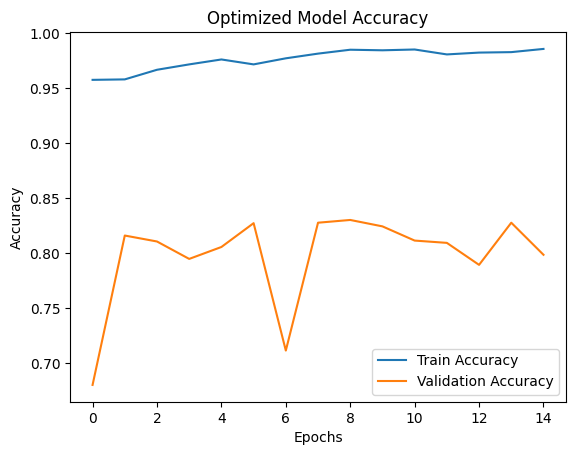

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Optimized Model Accuracy')
plt.show()


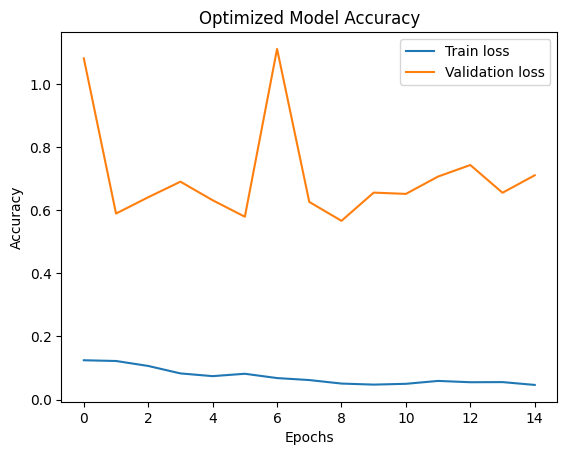

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Optimized Model Accuracy')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)


In [23]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8782 - loss: 0.4169
Validation Accuracy: 88.33%


In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8846 - loss: 0.3644
Test Accuracy: 88.72%


In [25]:
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [26]:
import numpy as np

# Convert y_test if it's one-hot encoded
if len(y_test.shape) > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


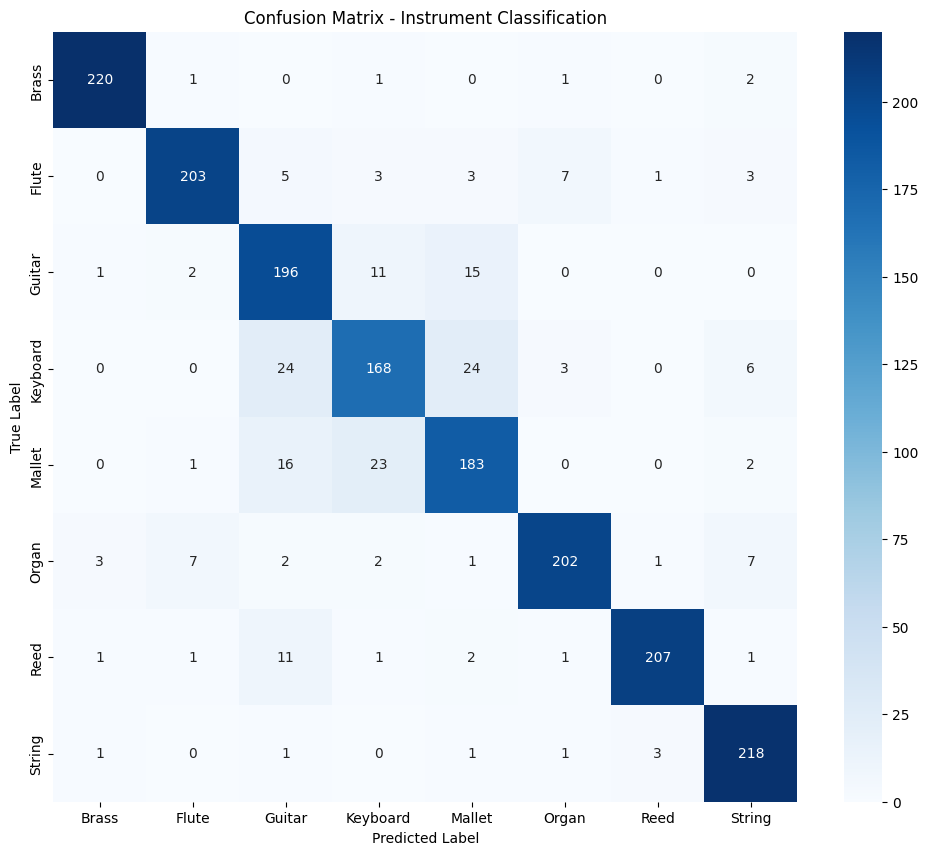

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Class names (IMPORTANT)
class_names = [
    "Brass",
    "Flute",
    "Guitar",
    "Keyboard",
    "Mallet",
    "Organ",
    "Reed",
    "String"
]

# Predict
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test if one-hot
if len(y_test.shape) > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(12,10))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Instrument Classification")
plt.show()



In [28]:
print(classification_report(
    y_test_classes,
    y_pred_classes,
    target_names=class_names
))



              precision    recall  f1-score   support

       Brass       0.97      0.98      0.98       225
       Flute       0.94      0.90      0.92       225
      Guitar       0.77      0.87      0.82       225
    Keyboard       0.80      0.75      0.77       225
      Mallet       0.80      0.81      0.81       225
       Organ       0.94      0.90      0.92       225
        Reed       0.98      0.92      0.95       225
      String       0.91      0.97      0.94       225

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800



In [29]:
import numpy as np
print(np.unique(y_train))


[0. 1.]


In [30]:
import os
import numpy as np

DATASET_PATH = "/content/drive/MyDrive/InstruNet-AI/Processed"

label_map = {
    "brass": 0,
    "flute": 1,
    "guitar": 2,
    "keyboard": 3,
    "mallet": 4,
    "organ": 5,
    "reed": 6,
    "string": 7
}

X = []
y = []

for instrument_name in os.listdir(DATASET_PATH):
    instrument_path = os.path.join(DATASET_PATH, instrument_name)

    if instrument_name not in label_map:
        continue

    for file in os.listdir(instrument_path):
        if file.endswith(".npy"):
            spec = np.load(os.path.join(instrument_path, file))
            X.append(spec)
            y.append(label_map[instrument_name])

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("Unique labels:", np.unique(y))


X shape: (0,)
Unique labels: []


In [31]:
import os

DATASET_PATH = "/content/drive/MyDrive/InstruNet-AI/Processed"

print("Exists:", os.path.exists(DATASET_PATH))
print("Folders inside Processed:")
print(os.listdir(DATASET_PATH))


Exists: True
Folders inside Processed:
['X.npy', 'y.npy', 'label_map.json']


In [32]:
import numpy as np
import json

BASE_PATH = "/content/drive/MyDrive/InstruNet-AI/Processed"

X = np.load(f"{BASE_PATH}/X.npy")
y = np.load(f"{BASE_PATH}/y.npy")

with open(f"{BASE_PATH}/label_map.json", "r") as f:
    label_map = json.load(f)

# Reverse map for names
class_names = [None] * len(label_map)
for name, idx in label_map.items():
    class_names[idx] = name

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique labels:", np.unique(y))
print("Class names:", class_names)


X shape: (12000, 128, 128)
y shape: (12000,)
Unique labels: [0 1 2 3 4 5 6 7]
Class names: ['brass', 'flute', 'guitar', 'keyboard', 'mallet', 'reed', 'string', 'vocal']


In [33]:
from sklearn.model_selection import train_test_split

X = X[..., np.newaxis]  # add channel dimension

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


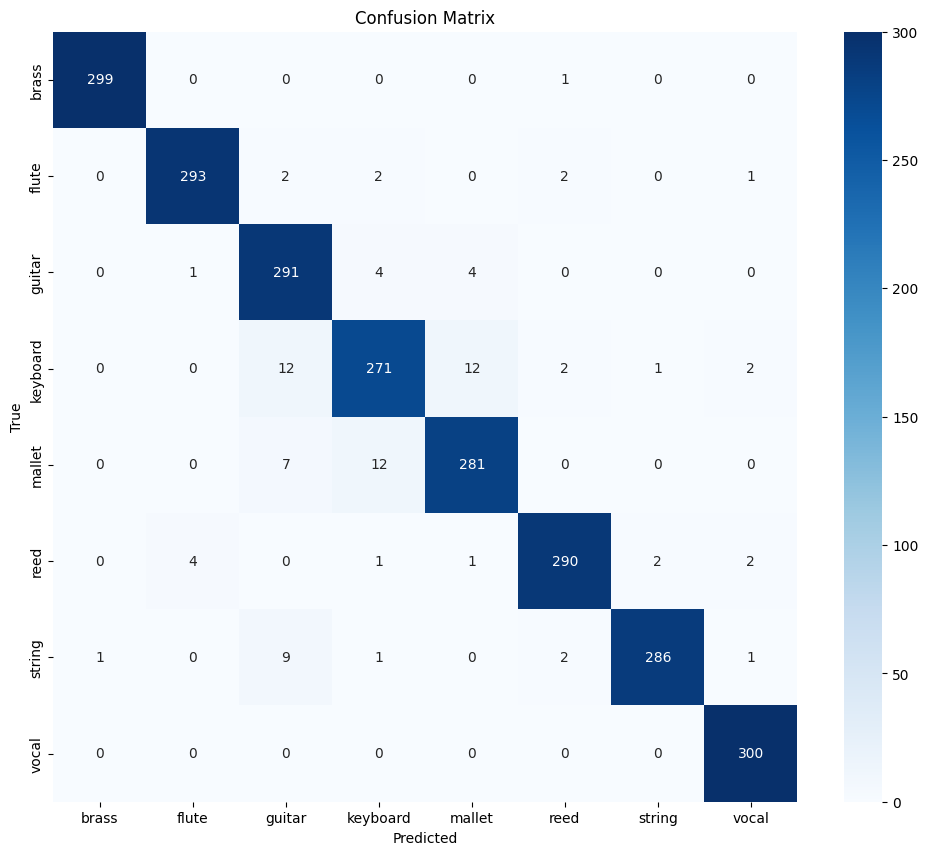

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(12,10))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [35]:
print(classification_report(
    y_test,
    y_pred_classes,
    target_names=class_names
))


              precision    recall  f1-score   support

       brass       1.00      1.00      1.00       300
       flute       0.98      0.98      0.98       300
      guitar       0.91      0.97      0.94       300
    keyboard       0.93      0.90      0.92       300
      mallet       0.94      0.94      0.94       300
        reed       0.98      0.97      0.97       300
      string       0.99      0.95      0.97       300
       vocal       0.98      1.00      0.99       300

    accuracy                           0.96      2400
   macro avg       0.96      0.96      0.96      2400
weighted avg       0.96      0.96      0.96      2400

